In [33]:
# !pip install wordcloud

In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [5]:
def back_to_list(s):
    end = s.replace('[', '').replace(']', '').replace('\'', '').replace(' ', '').split(',')
    return end

data = pd.read_csv("newshead/final/train.csv")
data.text = data.text.apply(lambda x: back_to_list(x))
data.title = data.title.apply(lambda x: back_to_list(x))
data.head()

,url,text,title
0,https://www.express.co.uk/showbiz/tv-radio/112...,"[Eurovision, 2019, Who, is, in, the, final, FR...","[Eurovision, 2019, final, Which, countries, ar..."
1,https://www.dw.com/en/albania-protesters-throw...,"[Several, thousand, demonstrators, took, to, t...","[Albania, Protesters, throw, Molotovs, clash, ..."
2,https://sports.yahoo.com/steph-curry-takes-uns...,"[MMA, Weekly, Despite, the, ill, will, between...","[Steph, Curry, takes, unsolicited, jab, at, hi..."
3,https://bleacherreport.com/articles/2835798-pr...,"[Gregory, PayanAssociated, Press, After, an, u...","[Preakness, 2019, Post, Time, TV, Schedule, Po..."
4,https://www.monstersandcritics.com/sport/nba/w...,"[On, Sunday, May, 12, the, NBA, Playoffs, prod...","[When, do, the, Raptors, play, again, in, the,..."


In [7]:
data['bodyLength'] = [len(x) for x in data.text]
data['titleLength'] = [len(x) for x in data.title]

C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:140

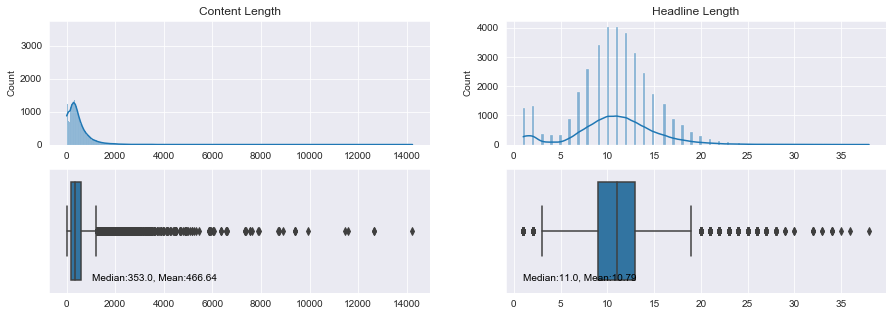

In [8]:
f = plt.figure(figsize=(15, 5))
gs = f.add_gridspec(2, 2)

# histogram
ax = f.add_subplot(gs[0, 0])
bodyhist = sns.histplot(data.bodyLength, kde=True)
bodyhist.set(xlabel=None)
plt.title("Content Length", fontsize=12)
ax = f.add_subplot(gs[0, 1])
titlehist = sns.histplot(data.titleLength, kde=True)
titlehist.set(xlabel=None)
plt.title("Headline Length", fontsize=12)

# boxplots
ax = f.add_subplot(gs[1, 0])
bodybox = sns.boxplot(data=data, x='bodyLength', orient='h')
bmedian, bmean = round(np.median(data.bodyLength), 2), round(np.mean(data.bodyLength), 2)
bodybox.text(1050, 0.4, f'Median:{str(bmedian)}, Mean:{str(bmean)}', horizontalalignment='left', color='black')
bodybox.set(xlabel=None)

ax = f.add_subplot(gs[1, 1])
titlebox = sns.boxplot(data=data, x='titleLength', orient='h')
tmedian, tmean = round(np.median(data.titleLength), 2), round(np.mean(data.titleLength), 2)
titlebox.text(1, 0.4, f'Median:{str(tmedian)}, Mean:{str(tmean)}', horizontalalignment='left', color='black')
titlebox.set(xlabel=None)

plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emmyp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


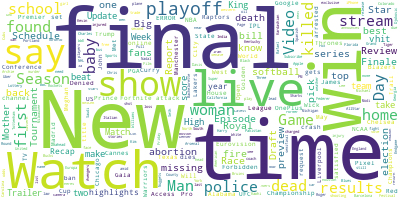

In [9]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['reuters', 'reuter', 'said', 'pct', 'mln', 'billions', 'n'])

full = []
for row in data.title:
    full += row
no_stopwords = [word for word in full if word not in stop_words]
freq_words = [x for x,y in Counter(no_stopwords).most_common(500)]
wordcloud = WordCloud(background_color="white", max_words=500, contour_width=3)
wordcloud.generate_from_text(' '.join(freq_words))
wordcloud.to_image()

## Below is LDA but hard to draw insightful conclusions..

In [11]:
!pip install gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.13
    Uninstalling Cython-0.29.13:
      Successfully uninstalled Cython-0.29.13


In [12]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
titles = data.title.values.tolist()
title_words = list(sent_to_words(titles))
# remove stop words
title_words = remove_stopwords(title_words)

C:\Users\emmyp\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [14]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(title_words)
# Create Corpus
texts = title_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in title_words]

In [38]:
from pprint import pprint
# number of topics
num_topics = 20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"game" + 0.009*"final" + 0.007*"vs" + 0.006*"new" + 0.005*"season" + '
  '0.004*"first" + 0.004*"nba" + 0.004*"says" + 0.004*"police" + 0.004*"win"'),
 (1,
  '0.009*"new" + 0.007*"game" + 0.006*"us" + 0.006*"vs" + 0.005*"league" + '
  '0.005*"win" + 0.004*"tv" + 0.004*"time" + 0.004*"abortion" + '
  '0.004*"results"'),
 (2,
  '0.009*"season" + 0.007*"final" + 0.007*"game" + 0.005*"vs" + 0.004*"found" '
  '+ 0.003*"win" + 0.003*"league" + 0.003*"thrones" + 0.003*"eurovision" + '
  '0.003*"day"'),
 (3,
  '0.005*"access" + 0.004*"new" + 0.004*"charged" + 0.004*"denied" + '
  '0.004*"live" + 0.004*"day" + 0.004*"gala" + 0.004*"met" + 0.004*"vs" + '
  '0.004*"man"'),
 (4,
  '0.011*"game" + 0.008*"vs" + 0.006*"season" + 0.005*"tv" + 0.005*"city" + '
  '0.004*"win" + 0.004*"dies" + 0.004*"day" + 0.004*"video" + 0.004*"says"'),
 (5,
  '0.010*"new" + 0.008*"game" + 0.007*"day" + 0.006*"first" + 0.005*"watch" + '
  '0.004*"vs" + 0.004*"season" + 0.003*"us" + 0.003*"cannes" + '
  '0

In [36]:
# !pip install --user pyLDAvis

In [39]:
import pyLDAvis
import pickle 
import os
from pyLDAvis import gensim_models
num_topics = 20
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
11     0.007041  0.006859       1        1  5.771771
17     0.029036 -0.052177       2        1  5.517947
5      0.004750  0.005326       3        1  5.460696
6      0.014260 -0.085259       4        1  5.431705
14    -0.084617 -0.024096       5        1  5.417604
15     0.038051  0.008963       6        1  5.377035
0      0.057367  0.014524       7        1  5.366465
13     0.033986 -0.020161       8        1  5.223930
1      0.043017  0.049615       9        1  5.182662
16    -0.027018  0.051182      10        1  5.018031
2      0.028010  0.020708      11        1  4.981868
4      0.020989 -0.020325      12        1  4.968007
18    -0.038682  0.019476      13        1  4.888682
12     0.039318  0.001371      14        1  4.654729
3     -0.066323 -0.081266      15        1  4.569306
8     -0.071081  0.012313      16        1  4.560927
9      0.029186 -0.003054      17        1  4.514096
10     0.026221 -0.023259      18        1  4.509390
7      0.005913  0.071042      19        1  4.407767
19    -0.089424  0.048218      20        1  4.177383, topic_info=        Term         Freq        Total Category  logprob  loglift
47     found   583.000000   583.000000  Default  30.0000  30.0000
1127  access   267.000000   267.000000  Default  29.0000  29.0000
1128  denied   226.000000   226.000000  Default  28.0000  28.0000
566     page   166.000000   166.000000  Default  27.0000  27.0000
161     game  1555.000000  1555.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
1294    baby    23.524909   542.086777  Topic20  -6.1862   0.0381
379   season    24.342820  1190.117149  Topic20  -6.1520  -0.7141
41     video    22.685261   583.988600  Topic20  -6.2225  -0.0727
825   school    22.044470   407.944443  Topic20  -6.2512   0.2574
102      man    22.645265   696.850608  Topic20  -6.2243  -0.2511

[1723 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
14590     13  0.754735         aaps
3266       1  0.211884  abergavenny
3266       6  0.052971  abergavenny
3266       9  0.052971  abergavenny
3266      12  0.370796  abergavenny
...      ...       ...          ...
5137      18  0.644603        ziggy
5408      13  0.537849       zodiac
5408      16  0.268925       zodiac
176        7  0.530078   zuckerberg
176       14  0.265039   zuckerberg

[8547 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 18, 6, 7, 15, 16, 1, 14, 2, 17, 3, 5, 19, 13, 4, 9, 10, 11, 8, 20])